# PASO 1 
Pruebe Support Vector Machine regresor (cklearn.svm.SVR), con varios hiperparámetros como kernel = "linear" (con varios valores para el hiperparámetro C) o kernel = "rbf" (con varios valores para los hiperparámetros C y gamma). No se preocupe por lo que significan estos hiperparámetros por ahora. ¿Cómo funciona el mejor predictor SVR?

In [6]:
#prepare data
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]#" de las 4 caracteristicas
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

sc = StandardScaler()#media 0
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Kernel lineal

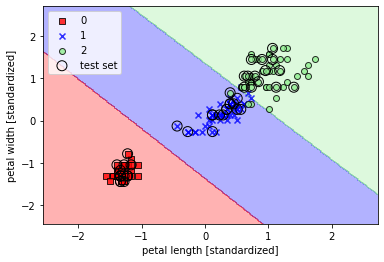

In [46]:
%matplotlib inline
from plot_regions import plot_decision_regions
from sklearn.svm import SVC

import matplotlib.pyplot as plt


svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Se puede utilizar C para controlar el ancho del margen. Los valores grandes de C corresponden a penelizaciones por errores grandes, mientras que un valor mas pequeño delimitamos el error.

# Kernel polinomial

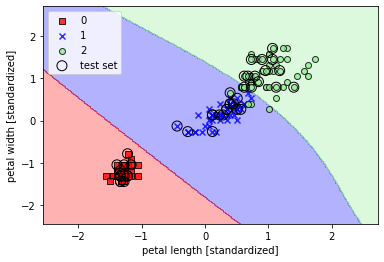

In [28]:
%matplotlib inline
from plot_regions import plot_decision_regions
from sklearn.svm import SVC

import matplotlib.pyplot as plt


svm = SVC(kernel='poly', C=1.0,random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Kernel Radial

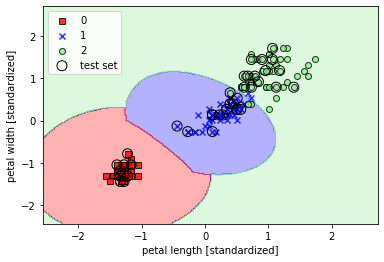

In [49]:
%matplotlib inline
from plot_regions import plot_decision_regions
from sklearn.svm import SVC

import matplotlib.pyplot as plt


svm = SVC(kernel='rbf', gamma=0.80,C=1.0,random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Entre mas aumenta el valor de gamma se va cerrando la circunferencia, lo que conduce a un limite de desicion mas estricto.

**Por lo tanto nos damos cuenta que las tecnicas que utilicemos dependen mucho del problema que estamos atacando.**

# Paso 2

Intente reemplazar GridSearchCV con RandomizedSearchCV.

In [58]:
#prepare data
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]#" de las 4 caracteristicas
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

sc = StandardScaler()#media 0
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

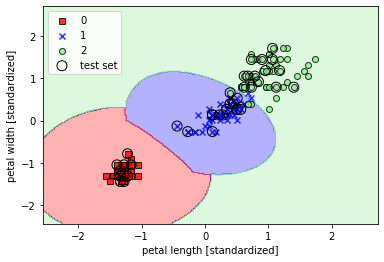

In [57]:
%matplotlib inline
from plot_regions import plot_decision_regions
from sklearn.svm import SVC
#from sklearn.model_selection import RandomizedSearchCv

import matplotlib.pyplot as plt


svm = SVC(kernel='rbf', gamma=0.80,C=1.0,random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Paso 3 
Intente agregar un transformador en la tubería de preparación para seleccionar solo los atributos más importantes

# Paso 4
Intente crear una única tubería que realice la preparación completa de los datos más la predicción final.

# Paso 5

Explore automáticamente alguna opción de preparación usando GridSearch.

# Paso 6
Utilizando el conjunto de datos de Wisconsin El cáncer de mama (diagnóstico), y siguiendo la lista de comprobación para proyectos ML dar a continuación:

   **1.** Pruebe la regresión lineal, la regresión polinómica, el Árbol de decisión y la Máquina de vectores de soporte para clasificar el cáncer maligno o benigno.
   
   **2.** Debe usar tuberías, búsqueda de cuadrícula, búsqueda aleatoria y validación cruzada de pliegue en k para encontrar el mejor modelo.
    
   **3.** Haga una tabla con la comparación de las actuaciones de los modelos.
    **4.** Haga una tabla con la comparación de los desempeños de algoritmos (tiempo y tiempo computacional). 

In [96]:
import numpy as np
from sklearn import datasets

datos = datasets.load_breast_cancer()
#seleccion = datos
#datos.target[[10, 50, 85]]
X = datos.data[:]
y= datos.target

#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

sc = StandardScaler()#media 0
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Regresion Lineal 

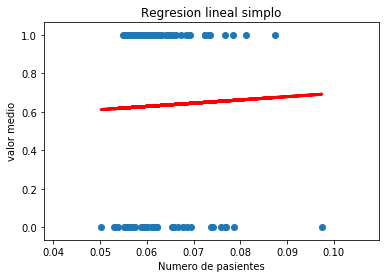

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

datos = datasets.load_breast_cancer()

X= datos.data[:,np.newaxis,9]
y= datos.target

# Separamos los datos en entrenamienro y prueba  80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Implementamos el algoritmo
lr = linear_model.LinearRegression()

#Entrenamos el modelo
lr.fit(X_train, y_train)

#Realizamos la prediccion
y_pred = lr.predict(X_test)


#Graficamos los datos juntos con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Regresion lineal simplo')
plt.xlabel('Numero de pasientes')
plt.ylabel('valor medio')
plt.show()


#plt.scatter(X, Y)
#plt.plot(X, Y, color='red', linewidth=3)
#plt.title('Regresion lineal simplo')
#plt.xlabel('Numero de pasientes')
#plt.ylabel('valor medio')
#plt.show()

#print(datos.keys())
#print(datos.feature_names)
#print(datos.DESCR)


# Regresion lineal Polinomial

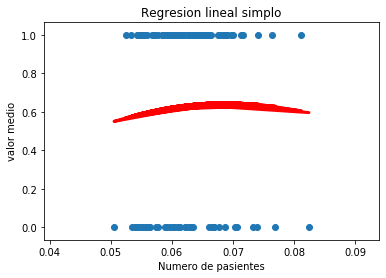

In [140]:
from sklearn.preprocessing import PolynomialFeatures


# Separamos los datos en entrenamienro y prueba  80/20
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X,y,test_size=0.2)

poli_reg = PolynomialFeatures(degree = 2)#Grado del polinomio

#Se transforman las caracteristicas existentes en caracteristicas de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)



#definimos el algoritmo
pr= linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train_p)

#Realizo una prediccion 
y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos juntos con el modelo
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, y_pred_pr  , color='red', linewidth=3)
plt.title('Regresion lineal simplo')
plt.xlabel('Numero de pasientes')
plt.ylabel('valor medio')
plt.show()



# Arboles de desicion: